# ----------Performance of linear models in case of  imbalanced data-------------

In [16]:
#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [17]:
def draw_line(coef,intercept, mi, ma):
    # for the separating hyper plane ax+by+c=0, the weights are [a, b] and the intercept is c
    # to draw the hyper plane we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of y
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of y
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    return points 

## Task 1: Applying SVM

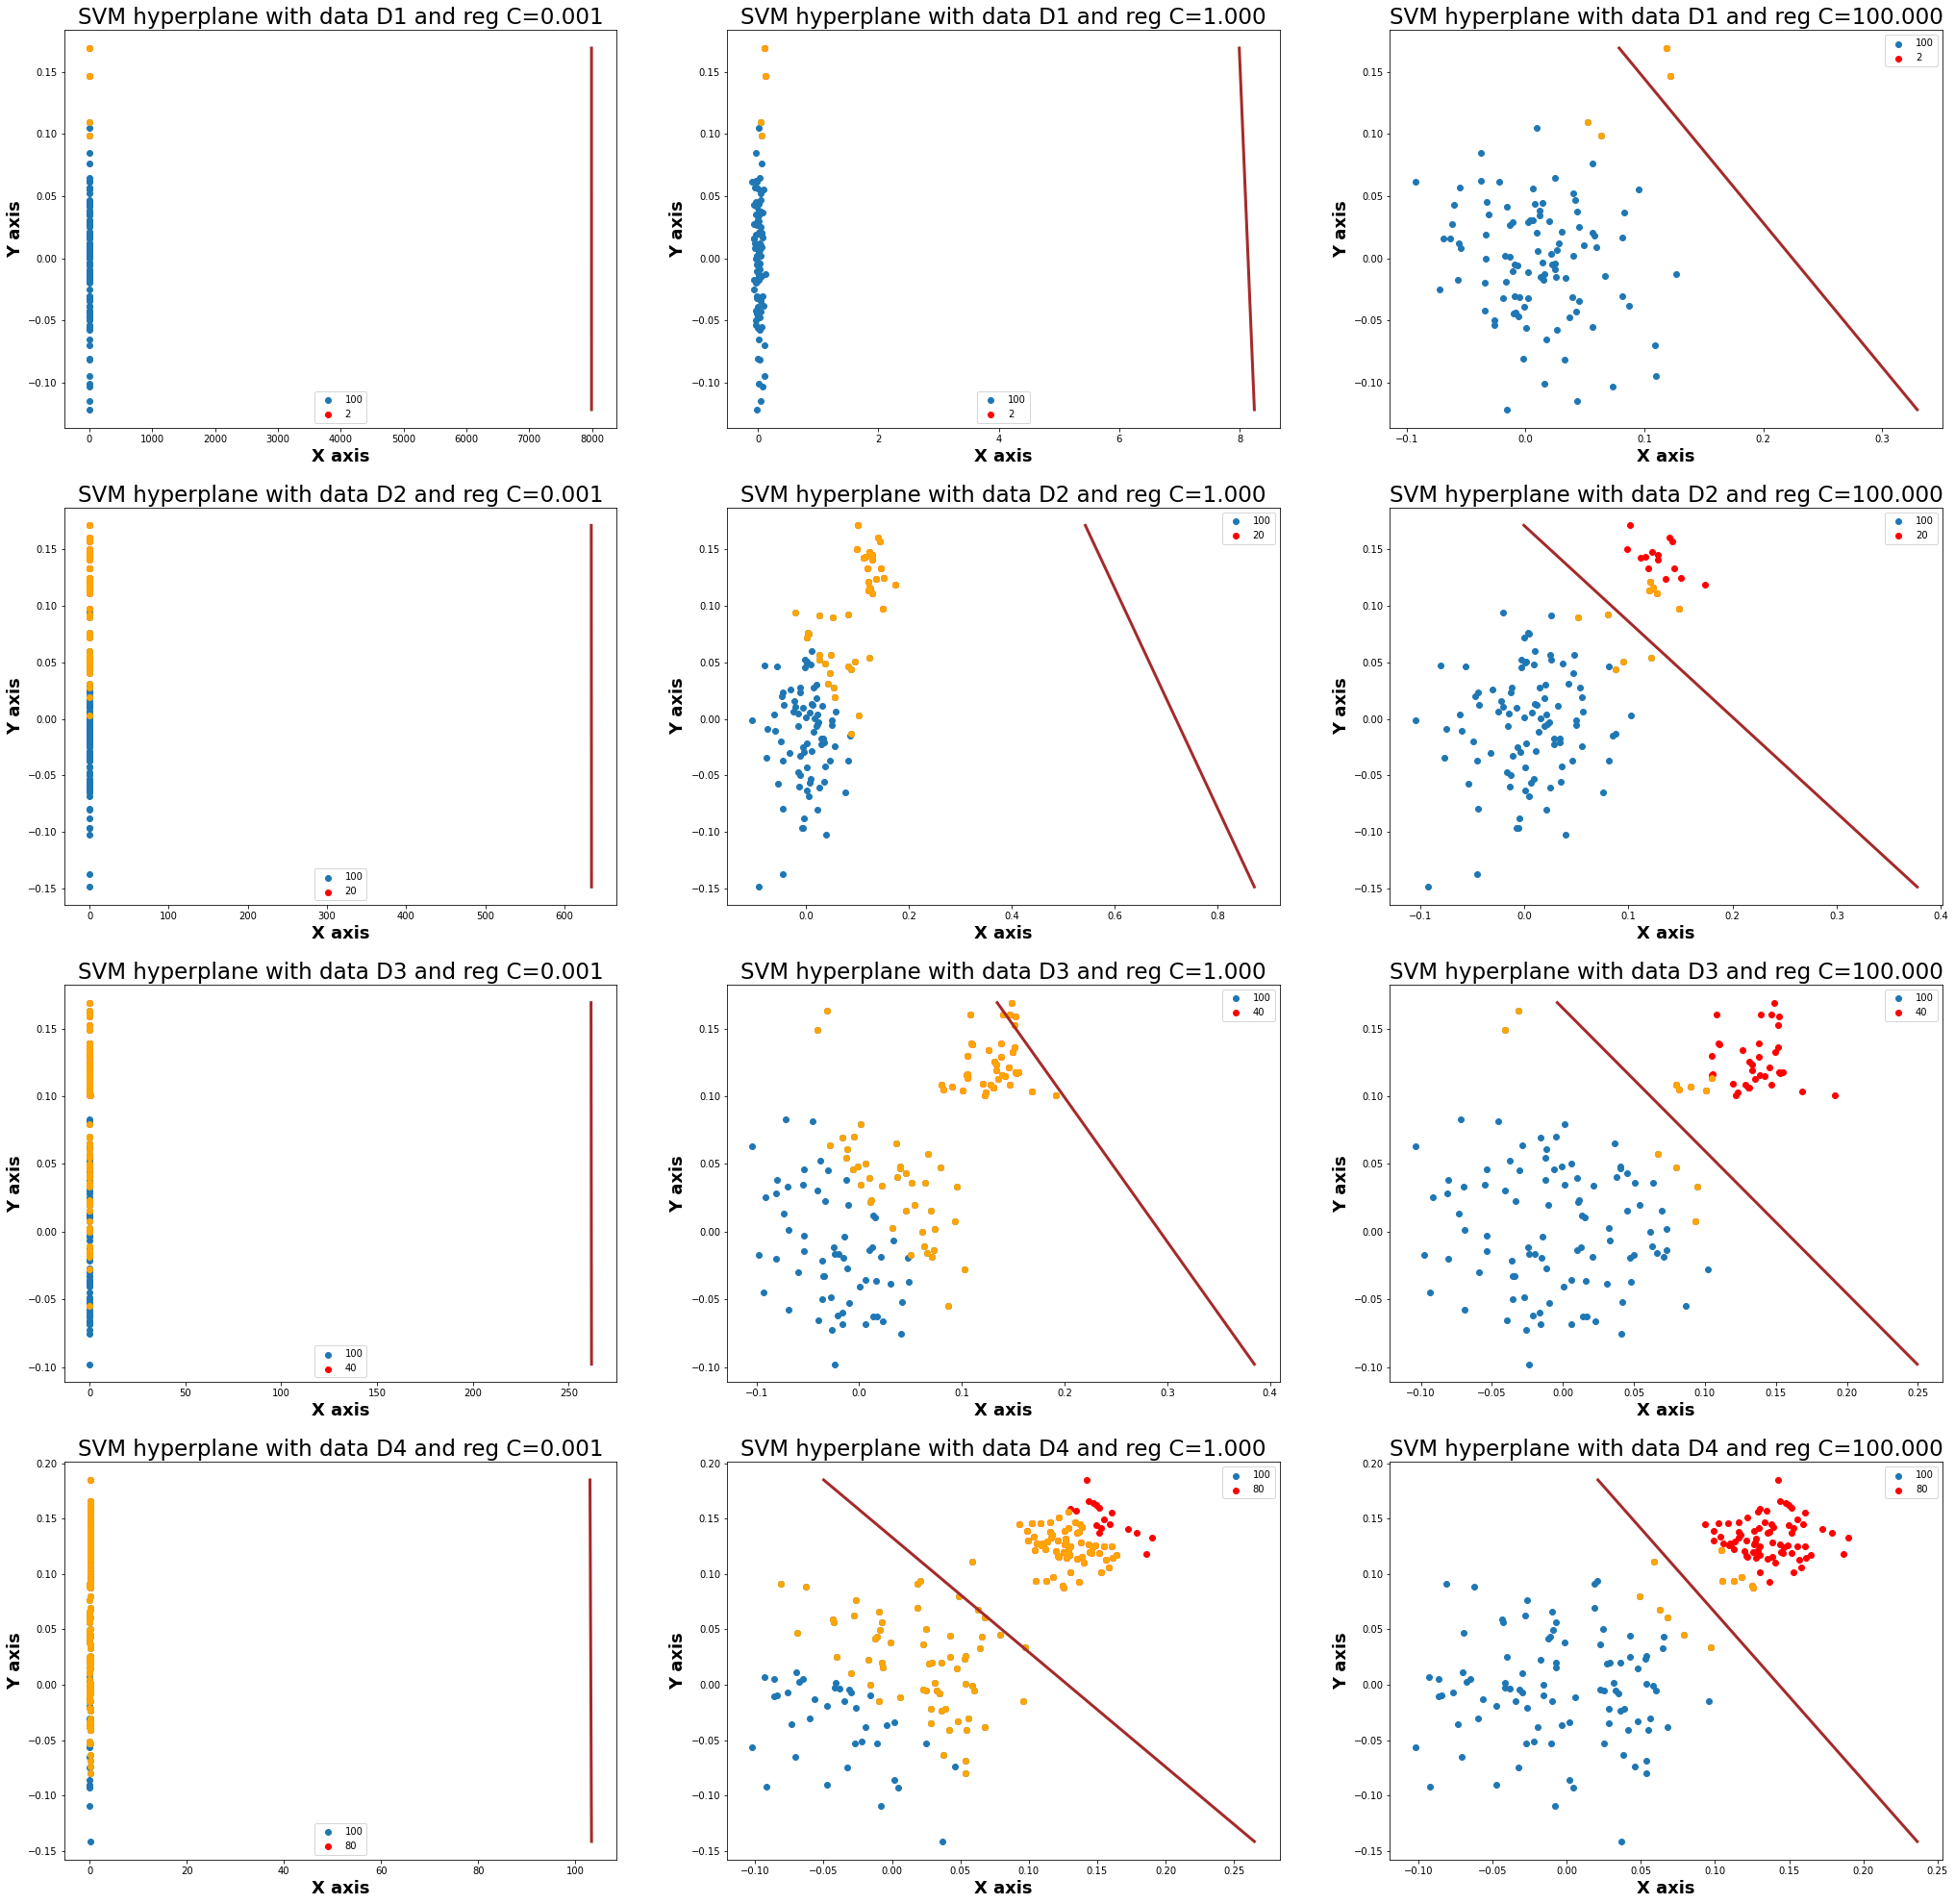

In [27]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]              #ratios of the imbalanced dataset to be created
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(35, 35))
np.random.seed(1)
regularization_value_list=[0.001, 1, 100]
for idx,i in enumerate(ratios): #for each dataset
    X_p=np.random.normal(0,0.05,size=(i[0],2))   # here we are creating 2d imbalanced data points 
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)          #creating y labels
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))                        #vertically stacking two classes data
    y=np.vstack((y_p,y_n))

 
    for j in range(len(regularization_value_list)):      #for each regularization value
        svc=SVC(kernel='linear',C=regularization_value_list[j])   #fitting svm model
        svc.fit(X,y)
        
        coef=svc.coef_                    #2 dim coefficients (weights) of the hyperplane
        intercept=svc.intercept_          # intercept of hyperplane
        sv=svc.support_vectors_           #support vectors coordination     
        mi=min(X[:, 1])                         #minimum y axis value of 2d data point (it help to calulate x axis value for hyperplane using draw line function) )
        ma=max(X[:, 1])                         #maximum y axis value of 2d data point 
        points=draw_line(coef[0],intercept[0], mi, ma)    
        axes[idx, j].scatter(X_p[:,0],X_p[:,1])                   #plotting all the class_1 points
        axes[idx, j].scatter(X_n[:,0],X_n[:,1],color='red')       #plotting all the class_2 points
        axes[idx, j].scatter(sv[:,0],sv[:,1],color='orange')      #plotting support vector points
        axes[idx, j].plot(points[:,0], points[:,1],linewidth=3.0,color="brown") #plotting hyperplace
        axes[idx, j].set_title("SVM hyperplane with data D%s and reg C=%1.3f"%((idx+1),regularization_value_list[j]),fontsize=23)
        axes[idx, j].legend(ratios[idx])
        axes[idx, j].set_xlabel('X axis', fontweight ='bold', fontsize=18)
        axes[idx, j].set_ylabel('Y axis', fontweight ='bold',fontsize=18)
        
fig.show()


# Observation for SVM
- In svm, C is determining how much weightage to give for minimizing error(eta)


- when the **C(regularisation) is very low(=0.001)**, it gives **less weightage to averaged eta**(avg distance of misclassified points).That is why what **irrespective of the class imbalance**, our hyperplane **underfitted** in the all four cases where **C=0.001**.When C is very very low it does not care about minimizing the error that caused due to misclassified points(eta) and it only cares about minimizing (1/margin).


- When the value of **C is moderate(=1)**, it give piority to both minimizing the error due to misclassified points(eta) and minimizing (1/margin) which we can see on the plots where **C=1** .**but here the imbalance data hugely determines the fit of the hyperplane**...since error due to the unbalanced class datapoint is not peanalised heavely.


- When the value of **C is High(=100)**, it give **high piority to minimizing the error due to misclassified points(eta) than minimizing (1/margin)** which we can see on the plots where C=100 .but here the **wherther balance or imbalance data ,our model fit well for all cases**...**since error due to the imbalanced class with few number of datapoint is also peanalised heavly.**
 

## Task 2: Applying LR

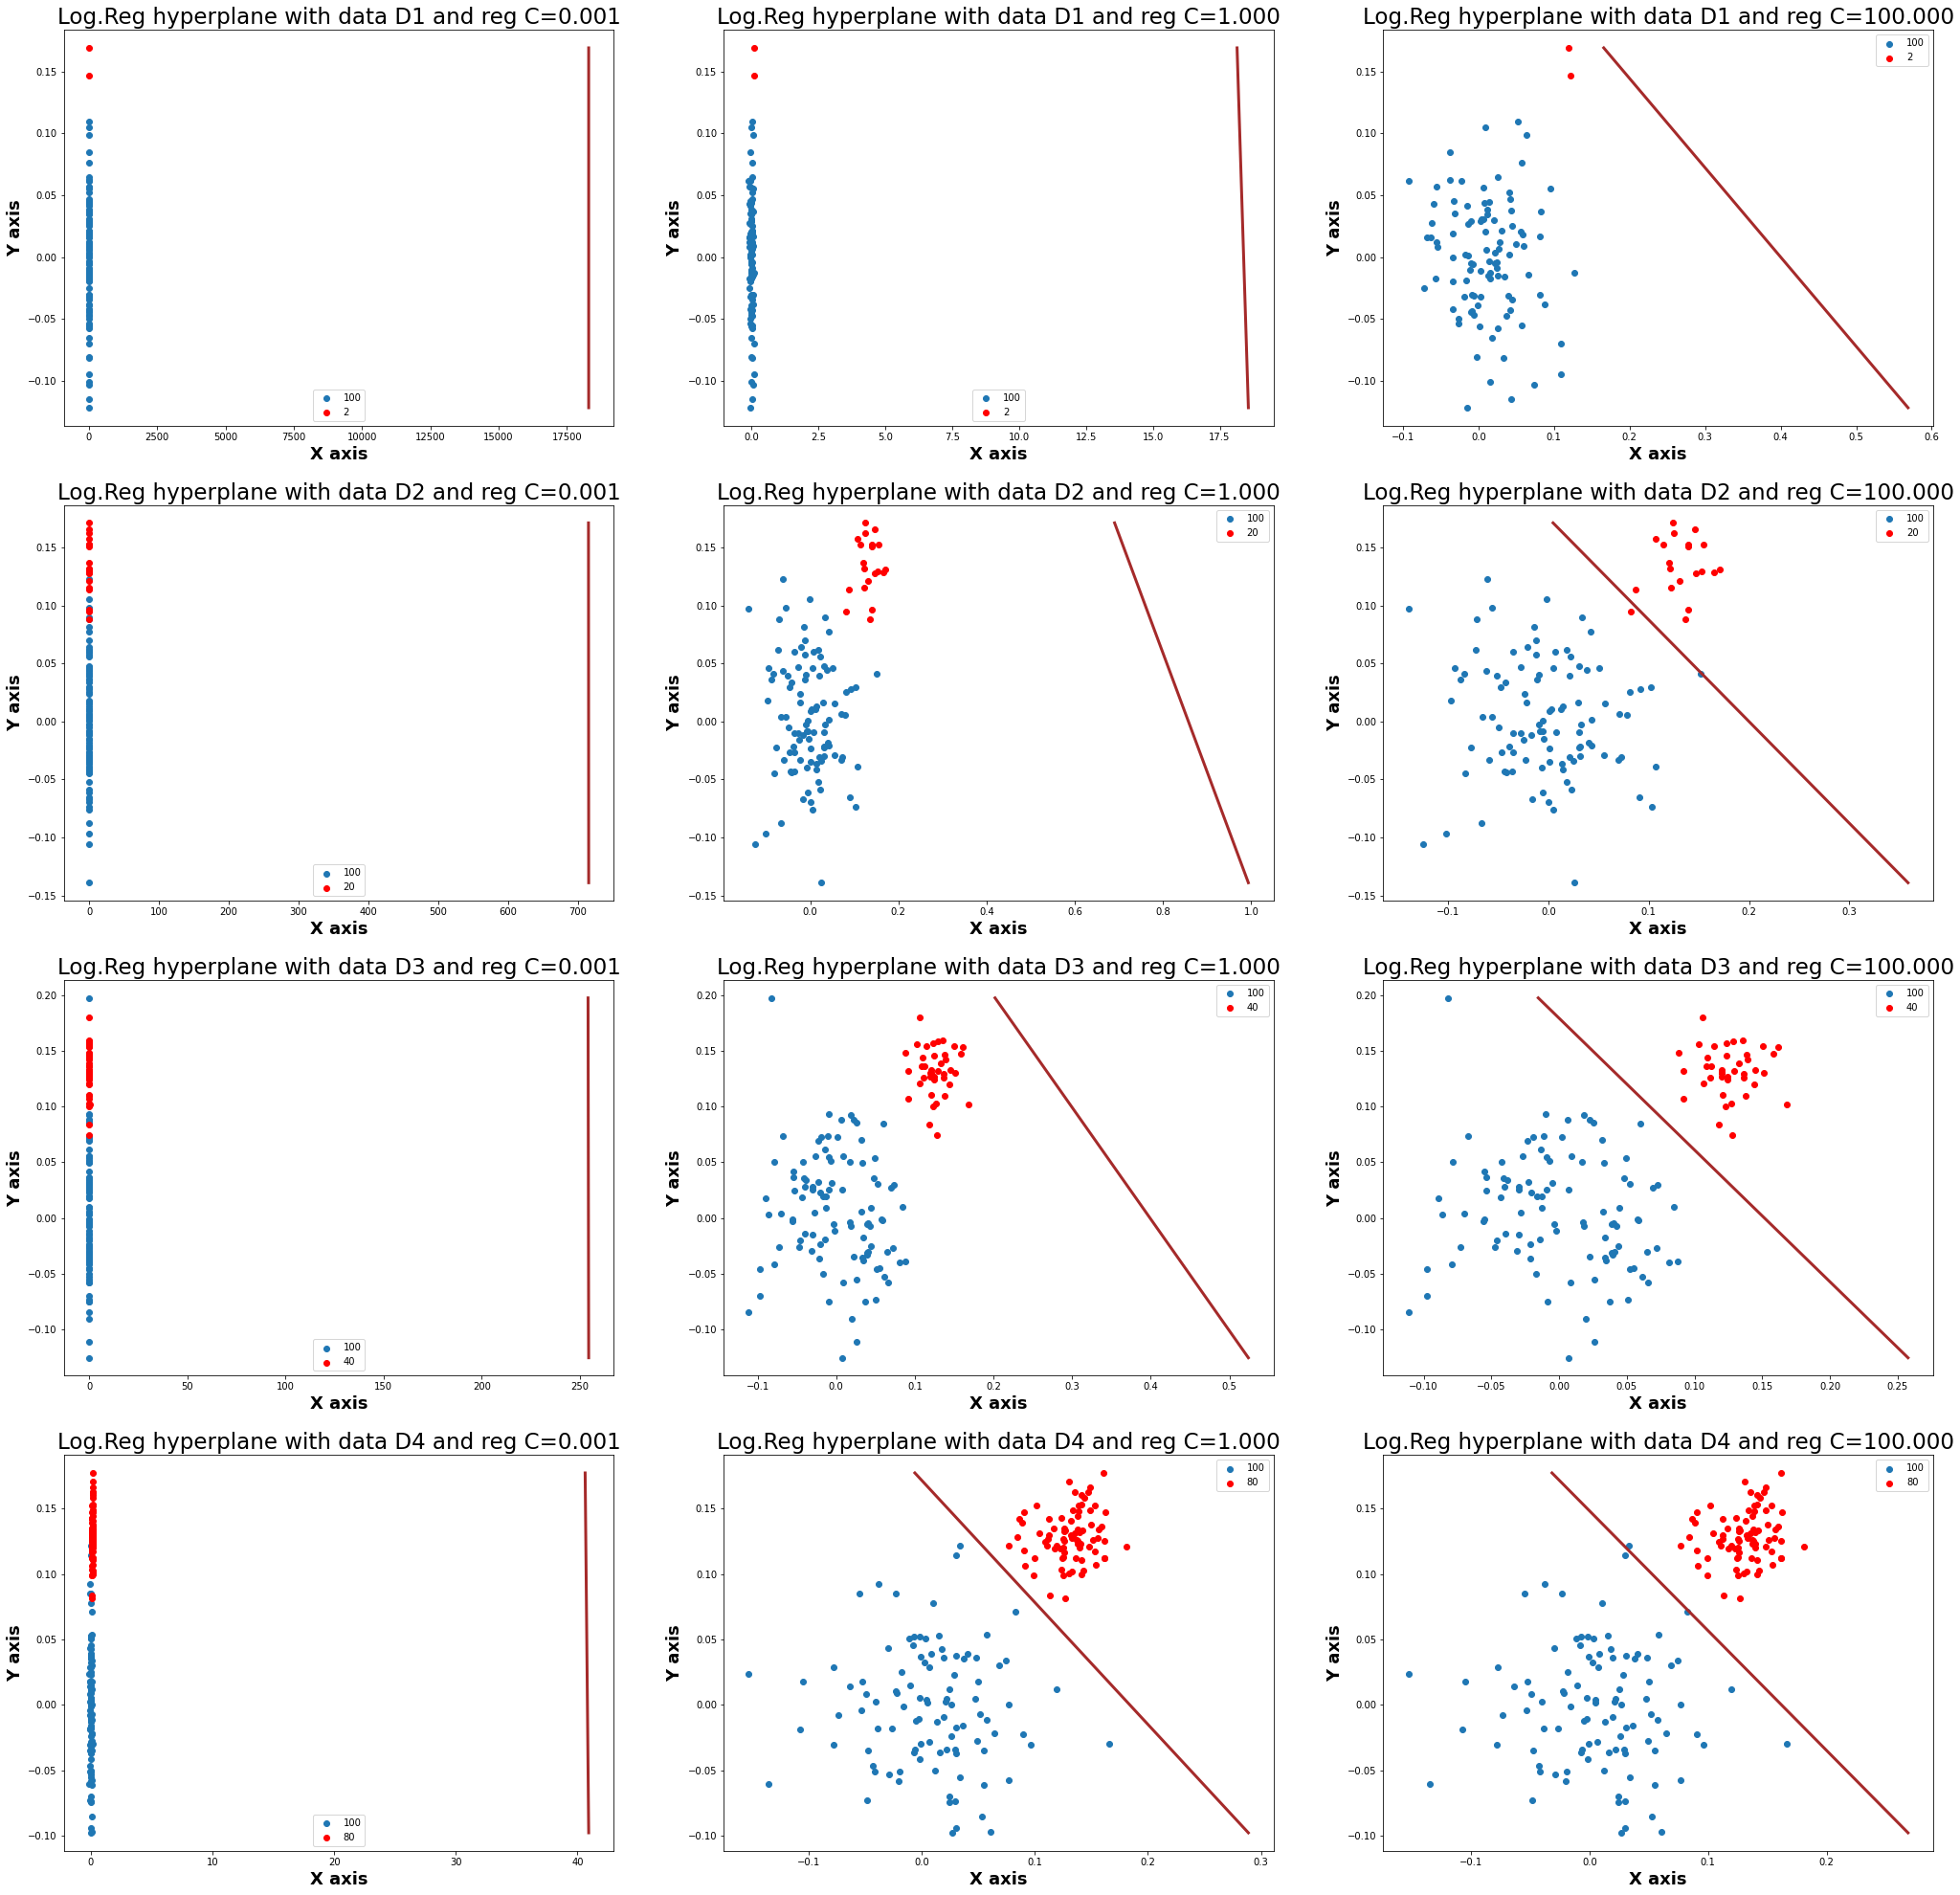

In [30]:
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]              #ratios of the imbalanced dataset to be created
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(35, 35))
np.random.seed(1)
regularization_value_list=[0.001, 1, 100]
for idx,i in enumerate(ratios): #for each dataset
    X_p=np.random.normal(0,0.05,size=(i[0],2))   # here we are creating 2d imbalanced data points 
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)          #creating y labels
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))                        #vertically stacking two classes data
    y=np.vstack((y_p,y_n))
 
    for j in range(len(regularization_value_list)):      #for each regularization value
        lr=LogisticRegression(C=regularization_value_list[j])
        lr.fit(X,y)
        coef=lr.coef_                     #coefficients (weights) of the hyperplane
        intercept=lr.intercept_           #intercept of hyperplane   
        mi=min(X[:, 1])                         #minimum y axis value of 2d data point   (it help to calulate x axis value for hyperplane using draw line function)
        ma=max(X[:, 1])                         #maximum y axis value of 2d data point  
        points=draw_line(coef[0],intercept[0], mi, ma)    
        axes[idx, j].scatter(X_p[:,0],X_p[:,1])                   #plotting all the class 1 points
        axes[idx, j].scatter(X_n[:,0],X_n[:,1],color='red')       #plotting all the class 2 points
        axes[idx, j].plot(points[:,0], points[:,1],linewidth=3.0,color="brown") #plotting hyperplace
        axes[idx, j].set_title("Log.Reg hyperplane with data D%s and reg C=%1.3f"%((idx+1),regularization_value_list[j]),fontsize=23)
        axes[idx, j].legend(ratios[idx])
        axes[idx, j].set_xlabel('X axis', fontweight ='bold', fontsize=18)
        axes[idx, j].set_ylabel('Y axis', fontweight ='bold',fontsize=18)
fig.show()


# Observation for LR 
- In LG **C=(1/lambda)** which is act like the giving weightage to regularization term **(l1 or l2 regularization term)**


- Here low value of C(=0.001) or high vaule of lambda used to give high weightage to Regularization term...regularization term is used for **avoiding overfitting but giving high weightage to them make model underfit**.


- When **C(=100)** very large, lower weightage given to Regularization term so by defaulf **higher waightage given to minimizing logistic loss**...**so the model fit the data well to minimize loss and also lower weighted regularization term make sure that our model does not overfit to train data**

# SVM vs LR
- we can see that **SVM model fits well** when **C=large(=100)** even with **imbalance dataset of 100:2 ration**  but **LG does not preform well** in that case.


- But for the **almost balanced data** **SVM and LG** both fits well with the data